In [102]:
# import librerie
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [103]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #serve ad sistemare la configurazione del plot che creiamo

pd.options.mode.chained_assignment = None


# leggiamo i dati
df = pd.read_csv(r'C:\Users\daron\Downloads\archive (3)\movies.csv')

In [104]:
df.head(20)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   

                              released  score      votes            director  \
0        June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5          May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6        June 20, 1980 (United States)    7.9   188000.0         John Landis   
7    December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8        June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9         May 16, 1980 (United States)    7.0    10000.0         Walter Hill   
10   December 17, 1980 (United States)    6.1    18000.0      Buddy Van Horn   
11    October 26, 1984 (United States)    7.3    54000.0           Jamie Uys   
12   December 12, 1980 (United States)    5.3    30000.0       Robert Altman   
13  September 19, 1980 (United States)    7.7    49000.0      Robert Redford   
14       July 25, 1980 (United States)    7.1    37000.0      Brian De Palma   
15     October 3, 1980 (United States)    7.2    27000.0      Jeannot Szwarc   
16        May 16, 1980 (United States)    6.6    21000.0         Alan Parker   
17   December 19, 1980 (United States)    6.9    29000.0       Colin Higgins   
18    February 8, 1980 (United States)    6.8    66000.0      John Carpenter   
19   December 12, 1980 (United States)    6.8    26000.0      Sidney Poitier   

                     writer               star         country      budget  \
0              Stephen King     Jack Nicholson  United Kingdom  19000000.0   
1   Henry De Vere Stacpoole     Brooke Shields   United States   4500000.0   
2            Leigh Brackett        Mark Hamill   United States  18000000.0   
3              Jim Abrahams        Robert Hays   United States   3500000.0   
4        Brian Doyle-Murray        Chevy Chase   United States   6000000.0   
5             Victor Miller       Betsy Palmer   United States    550000.0   
6               Dan Aykroyd       John Belushi   United States  27000000.0   
7              Jake LaMotta     Robert De Niro   United States  18000000.0   
8              Jerry Sie

In [105]:
# datatypes per colonna
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [106]:
# vediamo se ci sono dati mancanti
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [107]:
df = df.dropna()

In [108]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [129]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [110]:
df.sort_values(by=['gross'],  inplace= False, ascending = False)


name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [111]:
pd.set_option('display.max_rows', None) # per poter visualizzare tutte le righe del dataset

In [128]:
#drop duplicate


df.drop_duplicates().sort_values(ascending=False)


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

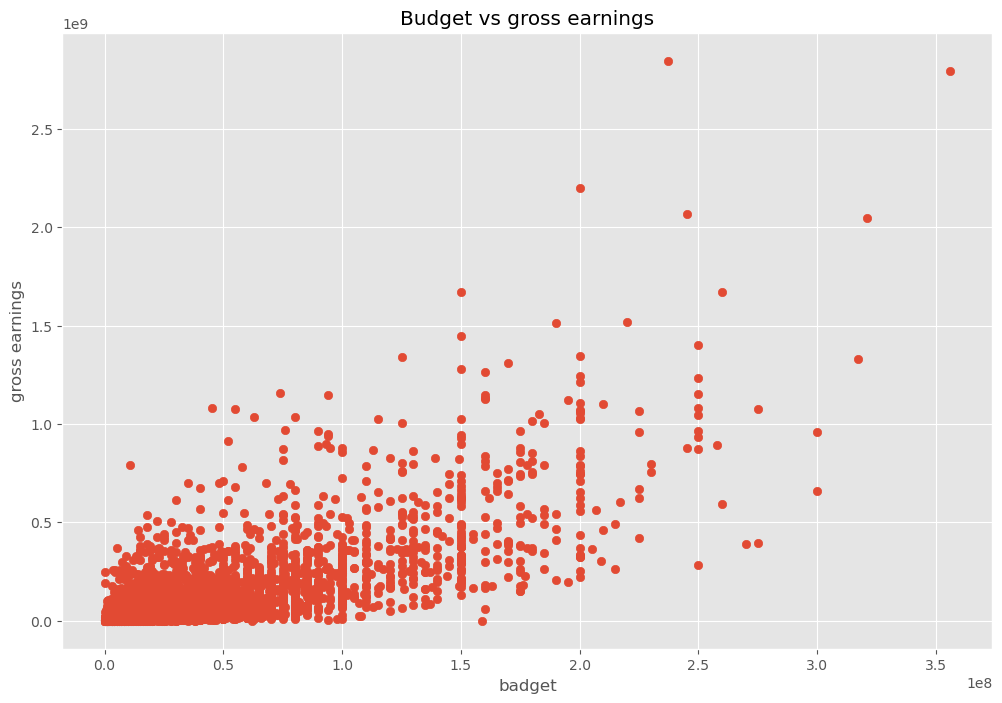

In [113]:
# cerco correlations
#costrisco scatterplot badget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs gross earnings')
plt.xlabel('badget')

plt.ylabel('gross earnings')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

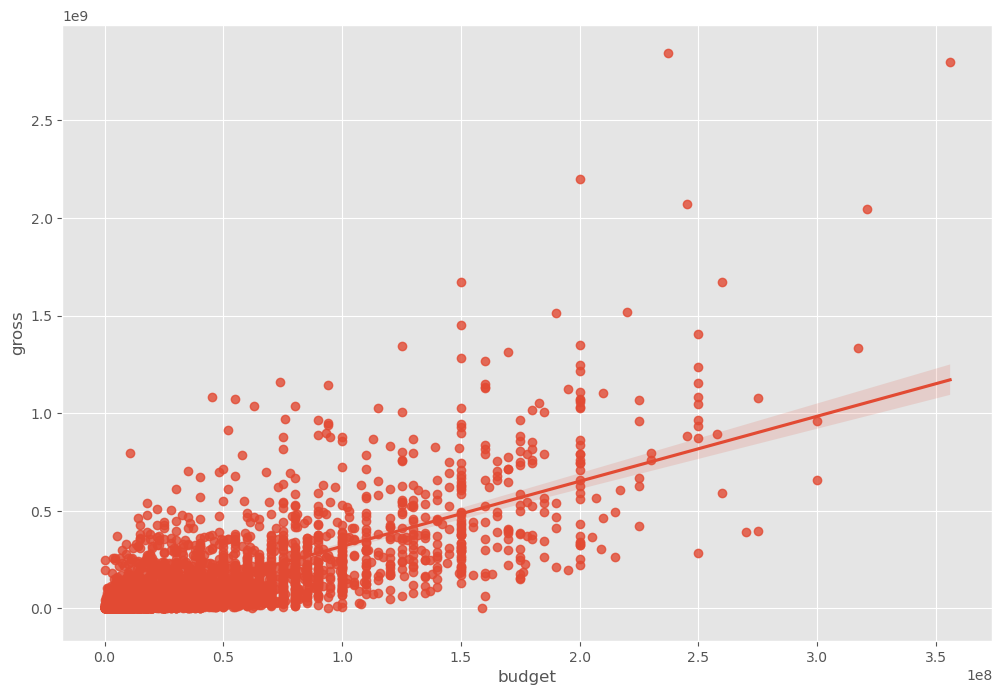

In [114]:

#plot badget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df)#, scatter_kws{"color":"red"}, line_kws={"color":"blue"}) 

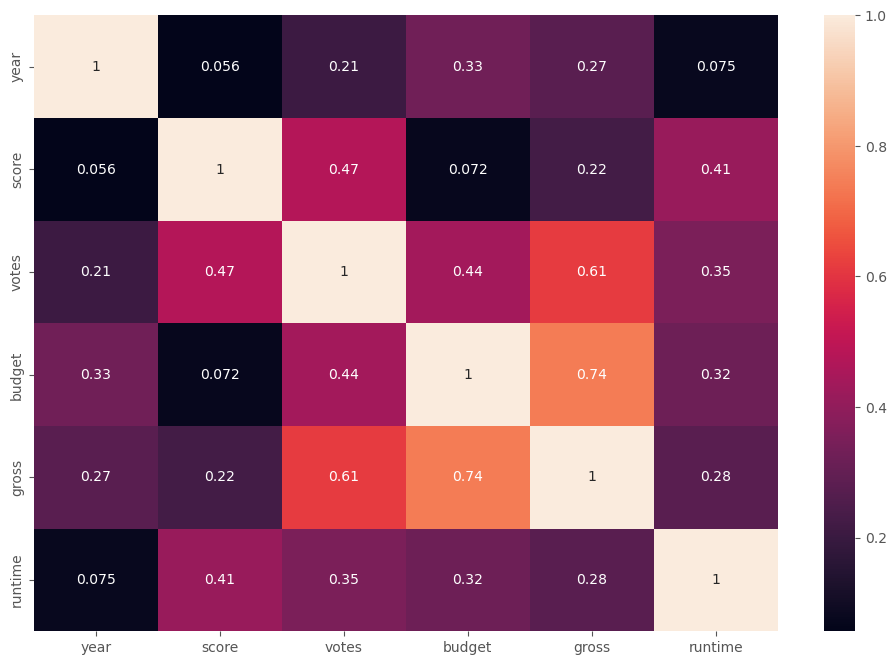

In [115]:
df_numerized = df
df_numerized = df.select_dtypes(include=[np.number])


df_numerized.corr(method='pearson') #spearman, pearson

corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [126]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

In [127]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

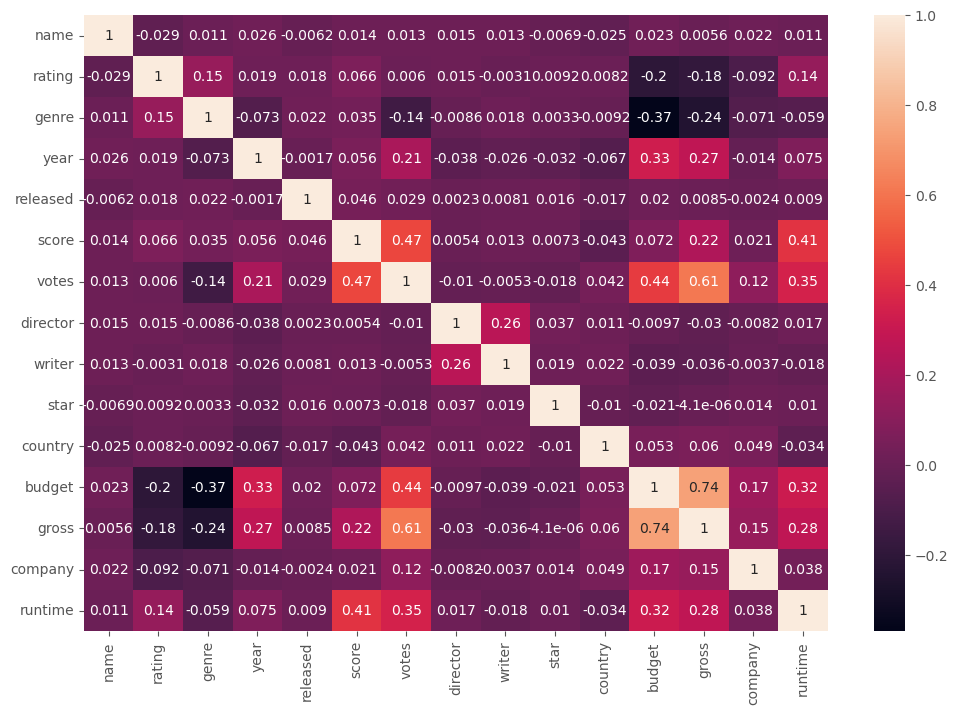

In [120]:


corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [123]:
corr_matrix= df_numerized.corr()
corr_pairs = corr_matrix.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [124]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [125]:
sorted_pairs[(sorted_pairs) > 0.5]


votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes e budget hanno la correlazione maggiore con gross earnings
#company ha bassa correlazione